### 📦 Configuración del Entorno Virtual

Para mantener tu proyecto organizado y evitar conflictos con otras librerías instaladas globalmente, es recomendable trabajar dentro de un **entorno virtual**.

#### Pasos para crear y activar un entorno virtual en VSCode:

1. Abre la terminal integrada (PowerShell) en VSCode.
2. Ejecuta el siguiente comando para crear el entorno virtual (puedes cambiar `myenv` por el nombre que prefieras):
   ```bash
   python -m venv myenv
   ```
3. Activa el entorno con
   ```bash
   myenv\Scripts\activate
   ```
Una vez activado, deberías ver el nombre del entorno (por ejemplo, (myenv)) al inicio de la línea en la terminal.

#### Instalación de librerías:
Con el entorno activado, puedes instalar las librerías necesarias usando pip desde la terminal integrada. Por ejemplo:

   ```bash
   pip install pandas numpy matplotlib
   ```


In [3]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Importamos la data de Microsoft
# Asegúrate de que el archivo 'microsoft.csv' esté en la carpeta 'data'
ms = pd.read_csv('data/microsoft.csv')
# Configuramos fechas como índice
ms['Date'] = pd.to_datetime(ms['Date'])
ms.set_index('Date', inplace=True)

### 📈 Estrategia basada en Medias Móviles (Moving Averages)

La estrategia de medias móviles se basa en observar el comportamiento del precio de una acción a lo largo del tiempo mediante promedios móviles de diferentes periodos:

1. El **promedio móvil de corto plazo** refleja cambios recientes en el precio de la acción. Esta tendencia se conoce como **Fast Signal** (señal rápida).
2. El **promedio móvil de largo plazo** representa la evolución del precio en un periodo más extenso. Esta tendencia se denomina **Slow Signal** (señal lenta).

A continuación, creamos dos medias móviles: **MA10** (media móvil de 10 días) y **MA50** (media móvil de 50 días), que representan la señal rápida y la señal lenta, respectivamente.

In [7]:
ms['MS10'] = ms['Close'].rolling(window=10).mean() #fast signal
ms['MS50'] = ms['Close'].rolling(window=50).mean() #slow signal
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,MS10,MS50
Date,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,86.5244
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,86.7606
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,86.9978
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,87.1828
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,92.582,87.2684


Luego, graficamos el precio de cierre junto con MA10 y MA50. Según algunos traders:

- Si **MA10 > MA50**, se interpreta que el precio de la acción podría subir en los próximos días.
- Si **MA10 < MA50**, se espera que el precio disminuya.

📌 **Estrategia de inversión**:  
Cuando MA10 es mayor que MA50, tomamos una posición larga (long) en la acción, es decir, compramos y mantenemos una unidad esperando que su valor aumente.

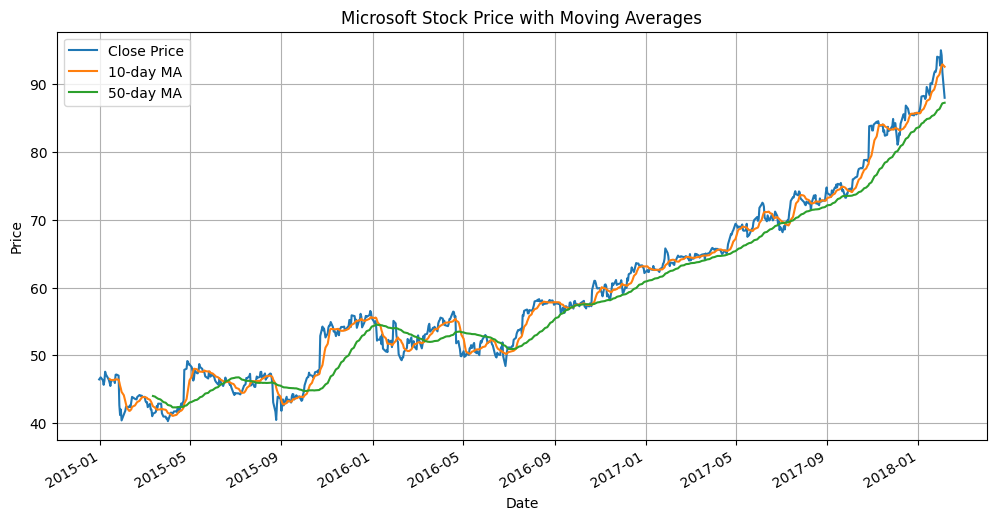

In [8]:
ms['Close'].plot(figsize=(12, 6), label='Close Price')
ms['MS10'].plot(label='10-day MA')
ms['MS50'].plot(label='50-day MA')
plt.legend()
plt.title('Microsoft Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()


Creamos una variable llamada `Shares` para indicar si tomamos una posición larga (1:True) o no (0:False), según si la media móvil de 10 días (`MA10`) es mayor que la de 50 días (`MA50`).

In [9]:
#Indicator for buying and holding shares
ms['Shares'] = [1 if ms.loc[ei, 'MS10'] > ms.loc[ei, 'MS50'] else 0 for ei in ms.index]


Luego, calculamos la ganancia diaria:

1. Creamos la variable `Close1`, que representa el precio de cierre del día siguiente.
2. Definimos `Profit` como la ganancia diaria:

  - Si `Shares = 1`, la ganancia es `Close1 - Close`.<br>
 - Si `Shares = 0`, la ganancia es 0.<br>

Estas ganancias pueden ser positivas o negativas. 

In [11]:
#Indicator for close price of the next day
ms['Close1'] = ms['Close'].shift(-1) #shifted close price
#Profit calculation
ms['Profit'] = [ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares'] == 1 else 0 for ei in ms.index]

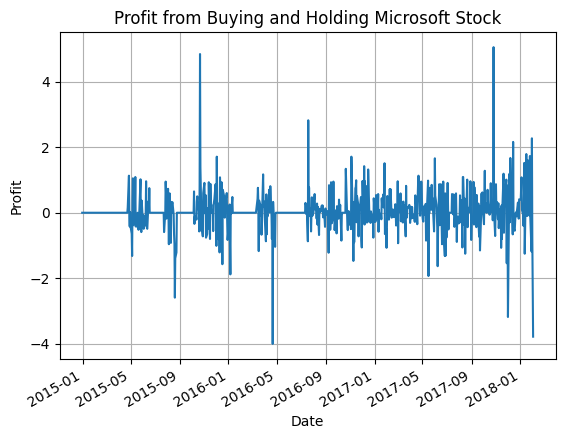

In [12]:
ms['Profit'].plot()
plt.title('Profit from Buying and Holding Microsoft Stock')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid()
plt.show()

Posteriormente, calculamos la riqueza acumulada (`Wealth`) usando el método `cumsum()` de pandas.
Finalmente, observamos las últimas filas del DataFrame para evaluar si la estrategia fue rentable.

In [15]:
ms['Wealth'] = ms['Profit'].cumsum() #cumulative sum of profit
ms.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MS10,MS50,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,,
2018-01-23,91.900002,92.300003,91.540001,91.900002,91.470322,23412800,89.582,85.6054,1,91.820000,-0.080002,27.350007
2018-01-24,92.550003,93.430000,91.580002,91.820000,91.390694,33277500,89.942,85.7600,1,92.330002,0.510002,27.860009
2018-01-25,92.470001,93.239998,91.930000,92.330002,91.898315,26383200,90.393,85.9292,1,94.059998,1.729996,29.590005
2018-01-26,93.120003,94.059998,92.580002,94.059998,93.620216,29172200,90.991,86.1318,1,93.919998,-0.140000,29.450005
2018-01-29,95.139999,95.449997,93.720001,93.919998,93.480873,31569900,91.423,86.3292,1,92.739998,-1.180000,28.270005
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,86.5244,1,95.010002,2.270004,30.540009
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,86.7606,1,94.260002,-0.750000,29.790009
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,86.9978,1,91.779999,-2.480003,27.310006
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,87.1828,1,88.000000,-3.779999,23.530007


In [17]:
print("El dinero que ganaste con esta estategia es ", ms.loc[ms.index[-2],'Wealth'])
print("El dinero que invertiste para esta estategia es ", ms.loc[ms.index[0],'Close'])

El dinero que ganaste con esta estategia es  23.53000699999999
El dinero que invertiste para esta estategia es  46.450001


**Estrategia de Medias Móviles Graficada**<br>
En esta gráfica podrás apreciar visualmente las ganacias generadas a lo largo del tiempo.<br>
Esta estrategia parece muy prometedora, pero existen muchas preguntas alrededor de la estrategia si la quieres implementar en un mercado real.<br>
Podemos obtener una mejor señal para hacer trading?<br>
Cómo evaluamos el desempeño de la estrategia?<br>
Estas preguntas serán resueltas en el capítulo siguiente.

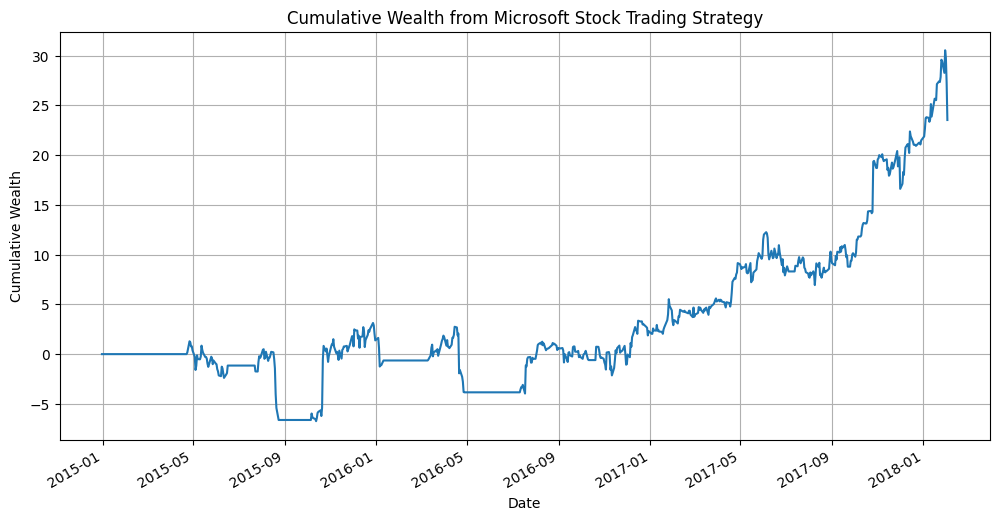

In [14]:
ms['Wealth'].plot(figsize=(12, 6))
plt.title('Cumulative Wealth from Microsoft Stock Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Wealth')
plt.grid()
plt.show()  